<a href="https://colab.research.google.com/github/oekasja/Kimia-Farma-Big-Data-Analyst-Final-Task/blob/main/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014(1).csv', on_bad_lines='skip')

<ipython-input-11-f44096a93093>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014(1).csv', on_bad_lines='skip')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop the first column `Unnamed: 0` and columns with all null values
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna(axis=1, how='all')

# Filter to include only rows where `loan_status` is either 'Fully Paid' or 'Charged Off'
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Convert `loan_status` to binary: 1 for 'Charged Off', 0 for 'Fully Paid'
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Create a new dataframe `df_model` with the specified columns
df_model = df[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']]

# Drop rows with missing values in `df_model`
df_model = df_model.dropna()

# Convert `term` to numeric (removing 'months' and converting to integer)
df_model.loc[:, 'term'] = df_model['term'].astype(str).str.replace(' months', '', regex=False).astype(int)

# Remove the string 'year' and '+' from the `emp_length` column and convert to numeric
df_model.loc[:, 'emp_length'] = df_model['emp_length'].astype(str).str.replace(r'[+ years]', '', regex=True).str.replace('< 1', '0', regex=True)
df_model['emp_length'] = pd.to_numeric(df_model['emp_length'], errors='coerce')

# Fill missing values in `emp_length` with the median
df_model['emp_length'] = df_model['emp_length'].fillna(df_model['emp_length'].median())

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['grade', 'home_ownership', 'verification_status', 'purpose'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = df_model.drop('loan_status', axis=1)
y = df_model['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on testing set: {accuracy:.2f}')

<ipython-input-12-fe7830fc3b9e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


Accuracy on testing set: 0.82


In [ ]:
import pandas as pd

# Get the coefficients of the trained logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame with columns `Feature` and `Coefficient`
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by `Coefficient` in descending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted DataFrame
print(coef_df.to_markdown(index=False, numalign="left", stralign="left"))

| Feature                             | Coefficient   |
|:------------------------------------|:--------------|
| int_rate                            | 0.149034      |
| inq_last_6mths                      | 0.0190983     |
| dti                                 | 0.00820537    |
| grade_E                             | 0.0081328     |
| grade_D                             | 0.00789504    |
| delinq_2yrs                         | 0.00689668    |
| open_acc                            | 0.00641091    |
| grade_F                             | 0.00466502    |
| verification_status_Verified        | 0.0025525     |
| purpose_small_business              | 0.00179713    |
| grade_G                             | 0.00155791    |
| verification_status_Source Verified | 0.00119867    |
| purpose_other                       | 0.000907477   |
| pub_rec                             | 0.000692483   |
| loan_amnt                           | 0.000287577   |
| purpose_medical                     | 0.000149

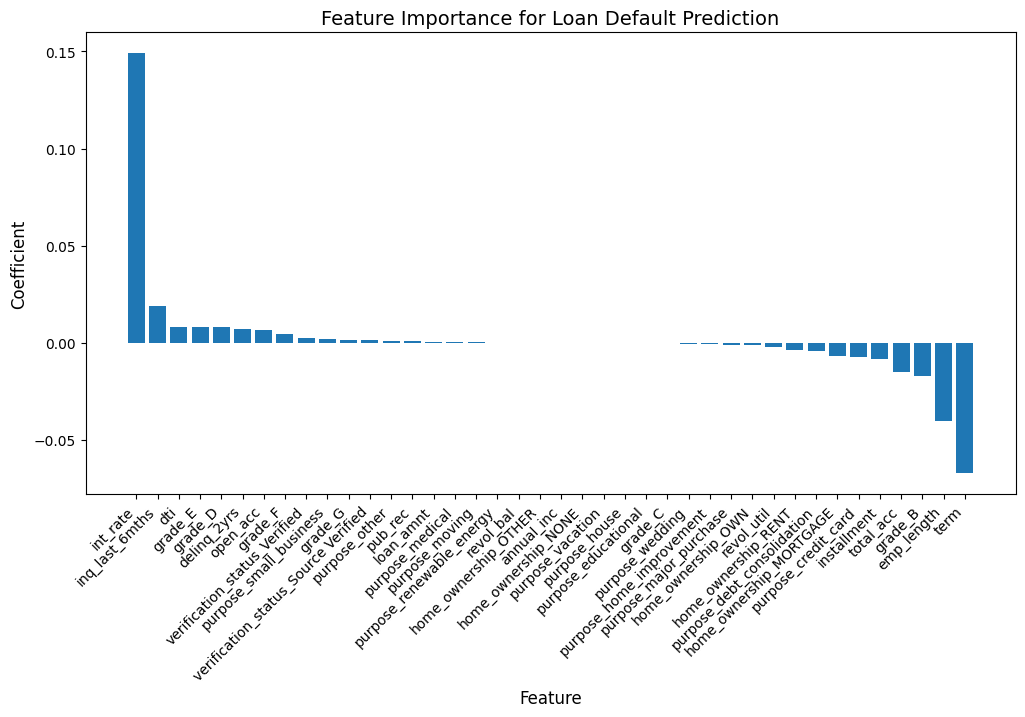

| Feature        | Coefficient   |
|:---------------|:--------------|
| int_rate       | 0.149034      |
| inq_last_6mths | 0.0190983     |
| dti            | 0.00820537    |
| grade_E        | 0.0081328     |
| grade_D        | 0.00789504    |


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.title('Feature Importance for Loan Default Prediction', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the first 5 rows of the dataframe
print(coef_df.head().to_markdown(index=False, numalign="left", stralign="left"))
